# Adaptive Filters
## LMS and Normalized LMS

Assignment:<br>See Lecture 6, slide 15<br> a.	Reproduce paragraph 6.7<br> b.	Chapter 6, problem 17<br>See Lecture 7, slide 13<br> c.	Chapter 7, problem 10 (which continues from problem 6.17)<br>
***
<center>Natanael Magno Gomes <b>397645</b></center>

***

In [1]:
#------------------------------------------------
# Import the libraries and config the environment
#------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

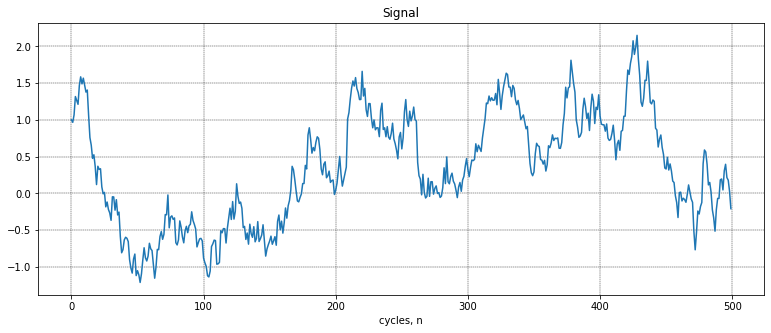

In [2]:
#------------------------------------------------
# Reproduce paragraph 6.7
#------------------------------------------------

# The difference formula is u(n) = -a * u(n - 1) + v(n)
# Let's create a function to create the signal with a
# given initial condition, the parameter a and sigma.

def ar(nsample, ic = 1, a = -0.99, sigma = 0.1709):  # sigma_square = 0.936 sigma = 0.1342 sigma = 0.213759
    v = np.random.normal(0,sigma,nsample)
    u = np.zeros(nsample)
    u[0] = ic
    for n in range(1,nsample,1):
        u[n] = (-1) * a * u[n-1] + v[n]
    return u

# initialize the random seed
np.random.seed(42) # the answer to life the universe and everything: 42
nsample = 500

u = ar(nsample, ic = 1)

# Plot
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Signal')
ax.plot(u)
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()

The variance is 0.936


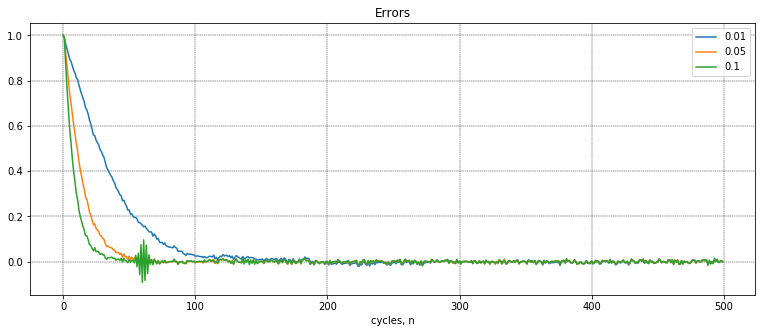

In [3]:
# for this experiment the LMS filter has only one tap

init = 1
carlos = 1000
mus = 3
y = np.zeros(nsample)
e = np.zeros((nsample,mus,carlos))
taps = np.zeros((nsample,mus,carlos))
mu = np.zeros(mus)
mu[0] = 0.01
mu[1] = 0.05
mu[2] = 0.1
stddev = np.zeros(carlos)

#run 1000 Monte Carlos simulations to calculate the mean
for i in range(carlos):
    #for each simulation there is an u[n]
    u = ar(nsample, ic = init)
    stddev[i] = np.std(u)
    e[0,:,i] = u[0]
    # run for the 3 mu
    for k in range(mus):
        # The LMS Filter for just one tap weight
        w = 0
        for n in range(1,nsample,1):
            # calculating step
            y[n] = u[n-1] * w
            # updating step
            e[n,k,i] = u[n] - y[n]
            w = w + mu[k] * u[n-1] * e[n,k,i]
            taps[n,k,i] = w

# Calculate the mean
f = np.zeros((nsample,mus))
for k in range(mus):
    f[:,k] = np.mean(e[:,k,:], axis=1)

print('The variance is {:0.3f}'.format(np.mean(stddev) ** 2))

# Plot the Errors
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Errors')
for k in range(mus):
    ax.plot(f[:,k],label=mu[k])
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
ax.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()

As expected the bigger 𝜇 convert faster to a small error, but also can be unstable. For this example it is possible to see the small unstability around 60 to 70 cicles, for 𝜇 = 0.1. For the others 𝜇 the system is completely stable. It was used 1000 Monte Carlo simulations and averaged to compute the result.
The book states that the variance of the process is $\\𝜎^2 = 0.936$, but to archieve this variance it is necessary to use a smaller standart deviation for the noise v[n], $\\𝜎 = 0.1709$, resulting a overall variance of the process as described on the book.

\begin{align} \mu \end{align}

C:\Users\natan\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
C:\Users\natan\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\natan\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in double_scalars


The variance is 0.900


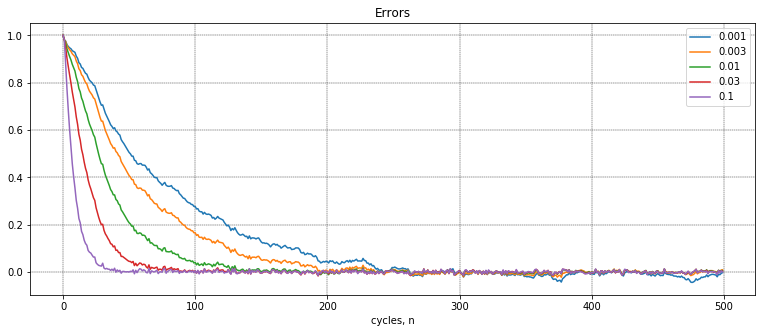

In [4]:
#------------------------------------------------
# Chapter 6, problem 19
# This one is an extra, it was on the previous assignment list
#------------------------------------------------
# Repeat the experiment on the learning curve of the first-order adaptive predictor plotted
# in Fig. 6.18, but this time use the following values for the step-size parameter: 0.001, 0.003,
# 0.01, 0.03, 0.1, 0.3, 1, 3.
# Comment on the results so obtained.
#------------------------------------------------
# To solve this exercise it is used the same code from the previous exercise
# adapted for these.

#------------------------------------------------
# This part of the code generates overflow let's suppress the warning
import warnings
# warnings.filterwarnings("ignore")
#------------------------------------------------

init = 1
carlos = 1000
mus = 8
y = np.zeros(nsample)
e = np.zeros((nsample,mus,carlos))
taps = np.zeros((nsample,mus,carlos))
mu = np.zeros(mus)
mu[0] = 0.001
mu[1] = 0.003
mu[2] = 0.01
mu[3] = 0.03
mu[4] = 0.1
mu[5] = 0.3
mu[6] = 1
mu[7] = 3
stddev = np.zeros(carlos)

#run 1000 Monte Carlos simulations to calculate the mean
for i in range(carlos):
    #for each simulation there is an u[n]
    u = ar(nsample, ic = init)
    stddev[i] = np.std(u)
    e[0,:,i] = u[0]
    # run for the 3 mu
    for k in range(mus):
        # The LMS Filter for just one tap weight
        w = 0
        for n in range(1,nsample,1):
            # calculating step
            y[n] = u[n-1] * w
            # updating step
            e[n,k,i] = u[n] - y[n]
            w = w + mu[k] * u[n-1] * e[n,k,i]
            taps[n,k,i] = w
# Calculate the mean
f = np.zeros((nsample,mus))
for k in range(mus):
    f[:,k] = np.mean(e[:,k,:], axis=1)

print('The variance is {:0.3f}'.format(np.mean(stddev) ** 2))

# Plot the Errors
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Errors')
for k in range(5):
    ax.plot(f[:,k],label=mu[k])
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
ax.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()


It is necessary to split the last two 𝜇, because they result in unstable response and the change of the scale does not allow the visualisation. They are on the graphs below.

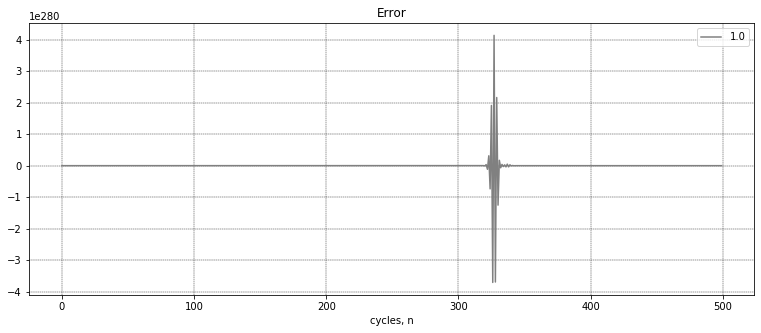

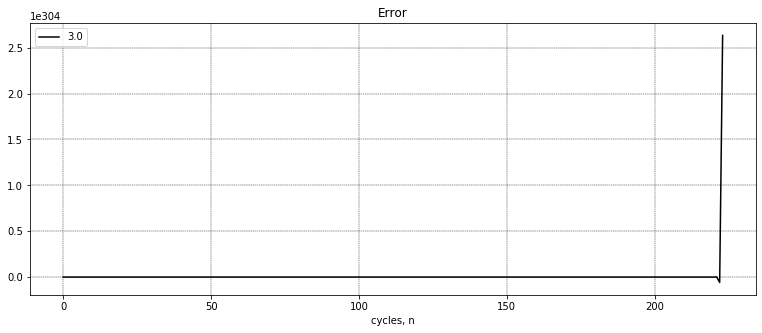

In [5]:
# Plot the Errors
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Error')
ax.plot(f[:,6],label=mu[6],color='gray')
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
ax.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Error')
ax.plot(f[:,7],label=mu[7],color='black')
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
ax.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()

It is possible to visualize how faster the error decay with the increase of 𝜇, but once the 𝜇 becomes too big the response of the system becomes unstable, leading to unpredictable result. It is know that this behavior of the LMS filter is due the feedback during the calculation of w (tap weights). One aproach to reduce this problem is using the normalized LMS.

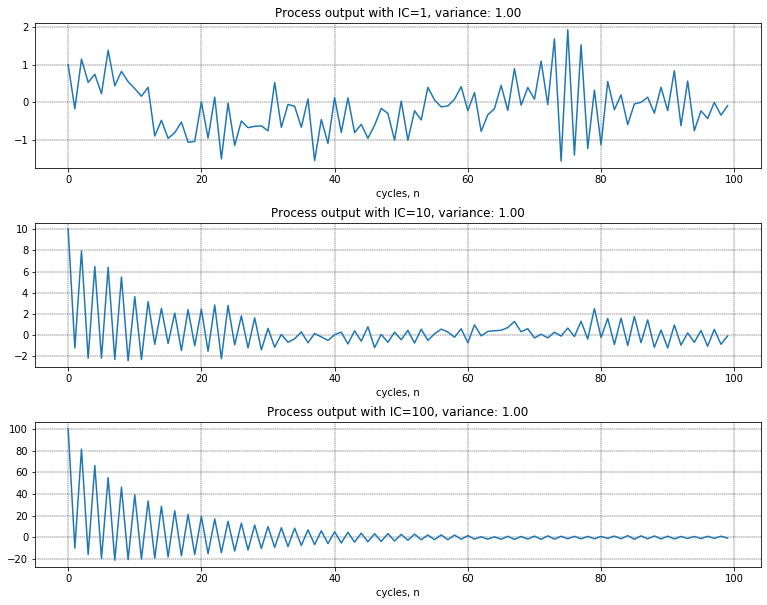

In [6]:
#------------------------------------------------
# Chapter 6, problem 17
#------------------------------------------------
# Consider an AR process u(n) defined by the difference equation
# u(n) = -a1*u(n - 1) - a2*u(n - 2) + v(n),
# where n(n) is an additive white noise of zero mean and variance s2
# The AR parameters a1 and a2 are both real valued:
# a1 = 0.1;
# a2 = -0.8.
# (a) Calculate the noise variance s2
# such that the AR process u(n) has unit variance. Hence,
# generate different realizations of the process u(n).
# (b) Given the input u(n), an LMS algorithm of length M = 2 is used to estimate the unknown
# AR parameters a1 and a2. The step-size parameter m is assigned the value 0.05. Justify
# the use of this design value in the application of the small step-size theory developed in
# Section 6.4.
# (c) For one realization of the LMS algorithm, compute the prediction error
# f(n) = u(n) - û(n)
# and the two tap-weight errors
# e1(n) = -a1 - ^w1(n)
# and
# e2(n) = -a2 - ^w2(n)
# Using power spectral plots of f(n), e1(n), and e2(n), show that f(n) behaves as white noise,
# whereas e1(n) and e2(n) behave as low-pass processes.
# (d) Compute the ensemble-average learning curve of the LMS algorithm by averaging the
# squared value of the prediction error f(n) over an ensemble of 100 different realizations
# of the filter.
# (e) Using the small step-size statistical theory of Section 6.4, compute the theoretical learning
# curve of the LMS algorithm and compare your result against the measured result of part (d).
#------------------------------------------------

# define a function for the process:
def aru(n, ic, sigma, a1 = 0.1, a2 = -0.8): # u(n) = -a1*u(n - 1) - a2*u(n - 2) + v(n)
    v = np.random.normal(0,sigma,n)
    u = np.zeros(n)
    u[0] = ic
    u[1] = -a1 * u[0] + v[1]
    for i in range(2,n,1):
        u[i] = (-1) * a1 * u[i-1] - a2 * u[i-2] + v[i]
    return u

# reinitialize the random seed
np.random.seed(42)

# parameters
n = 100
a1 = 0.1
a2 = -0.8
ic1 = 1
ic2 = 10
ic3 = 100
sigma1 = 0.5143
sigma2 = 0.522526
sigma3 = 0.26944

# generate the signal
u1 = aru(n,ic1,sigma1)
u2 = aru(n,ic2,sigma2)
u3 = aru(n,ic3,sigma3)

# calculate the deviance over a bigger signal
stddev1 = np.std(aru(50000,ic1,sigma1)) ** 2
stddev2 = np.std(aru(50000,ic2,sigma2)) ** 2
stddev3 = np.std(aru(50000,ic3,sigma3)) ** 2

#plot the result
fig, ax = plt.subplots(3,1,figsize=(13,10))
ax[0].set_title('Process output with IC=1, variance: {:.2f}'.format(stddev1))
ax[0].plot(u1)
ax[0].set_xlabel('cycles, n'), ax[0].grid(linestyle='--',linewidth='0.4', color='black')
ax[1].set_title('Process output with IC=10, variance: {:.2f}'.format(stddev2))
ax[1].plot(u2)
ax[1].set_xlabel('cycles, n'), ax[1].grid(linestyle='--',linewidth='0.4', color='black')
ax[2].set_title('Process output with IC=100, variance: {:.2f}'.format(stddev3))
ax[2].plot(u3)
ax[2].set_xlabel('cycles, n'), ax[2].grid(linestyle='--',linewidth='0.4', color='black')
plt.subplots_adjust(hspace = 0.38, wspace = 0.1)
plt.show()

On the plots above there are 3 outputs for the process using initial condition equal to 1, 10 and 100. Both signals have the unit variance.

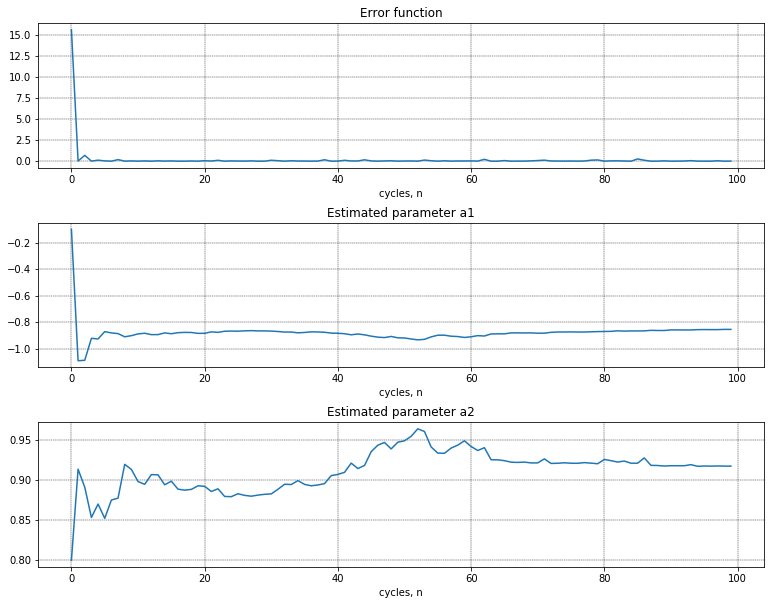

In [7]:
# b

mu = 0.05
m  = 2

# initialize with zeros
w = np.zeros(m)
y = np.zeros(n)
e = np.zeros(n)
e1 = np.zeros(n)
e2 = np.zeros(n)

# adjust dimensions
signal = np.append(aru(n = n, ic = 5, sigma = 0.21), np.zeros(m))

# perform
for i in range(n):
    # calculating step
    u = np.array(signal[i:i+m])
    y[i] = u.dot(w)
    # updating step
    e[i] = signal[i+m] - y[i]
    e1[i] = -a1 - w[0]
    e2[i] = -a2 - w[1]
    w = w + mu * u * e[i]
    y[i] = u.dot(w)

#plot the result
fig, ax = plt.subplots(3,1,figsize=(13,10))
ax[0].set_title('Error function')
ax[0].plot(e ** 2)
ax[0].set_xlabel('cycles, n'), ax[0].grid(linestyle='--',linewidth='0.4', color='black')
ax[1].set_title('Estimated parameter a1')
ax[1].plot(e1)
ax[1].set_xlabel('cycles, n'), ax[1].grid(linestyle='--',linewidth='0.4', color='black')
ax[2].set_title('Estimated parameter a2')
ax[2].plot(e2)
ax[2].set_xlabel('cycles, n'), ax[2].grid(linestyle='--',linewidth='0.4', color='black')
plt.subplots_adjust(hspace = 0.38, wspace = 0.1)
plt.show()

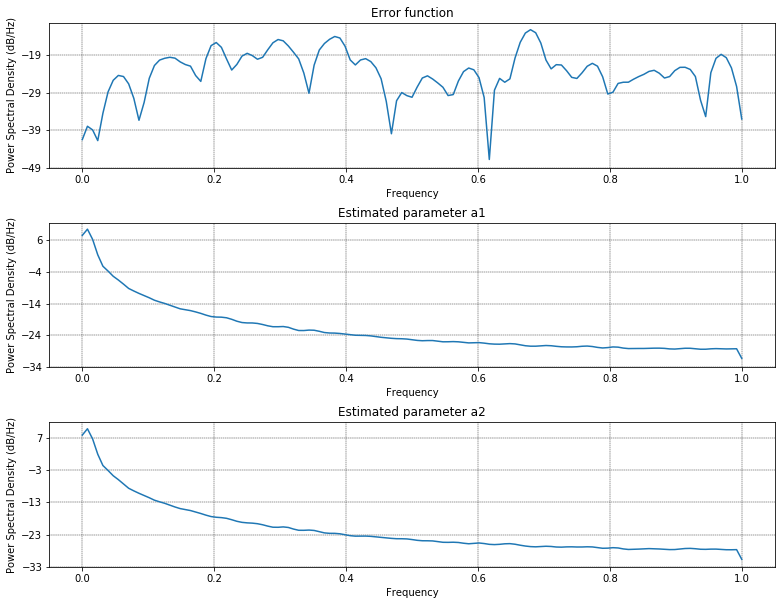

In [8]:
# The exercise asks to plot power spectral plots
#plot the result
fig, ax = plt.subplots(3,1,figsize=(13,10))
ax[0].set_title('Error function')
ax[0].psd(e)
ax[0].set_xlabel('Frequency'), ax[0].grid(linestyle='--',linewidth='0.4', color='black')
ax[1].set_title('Estimated parameter a1')
ax[1].psd(e1)
ax[1].set_xlabel('Frequency'), ax[1].grid(linestyle='--',linewidth='0.4', color='black')
ax[2].set_title('Estimated parameter a2')
ax[2].psd(e2)
ax[2].set_xlabel('Frequency'), ax[2].grid(linestyle='--',linewidth='0.4', color='black')
plt.subplots_adjust(hspace = 0.38, wspace = 0.1)
plt.show()

As expected the error function f(n) behave as white noise, e1(n) and e2(n) behave as low-pass processes.

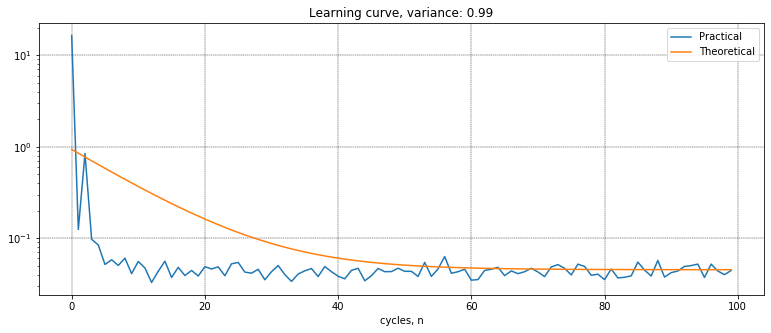

In [9]:
# 100 Monte Carlo simulations
carlos = 100

# initialize with zeros
y = np.zeros((n,carlos))
e = np.zeros((n,carlos))
deva = np.zeros(carlos)

# parameter
mu = 0.05
sigma = 0.21

# perform
for k in range(carlos):
    signal = aru(n = (n+m), ic = 5, sigma = sigma)
    w = np.zeros(m)
    for i in range(n):
        # calculating step
        u = np.array(signal[i:i+m])
        y[i,k] = u.dot(w)
        # updating step
        e[i,k] = signal[i+m] - y[i,k]
        w = w + mu * u * e[i,k]
    deva[k] = np.std(signal)

# Calculate the mean
f = np.zeros(n)
f = np.mean(e ** 2, axis=1)
dev = np.mean(deva) ** 2

#Teorethical Learning curve
sigma_v = sigma ** 2
sigma_u = dev
nn = np.array(range(n))
J = sigma_v * (1 + (mu/2) * sigma_u) + sigma_u*(0.9 - (mu/2) * sigma_v)*((1-mu*sigma_u)**(2*nn))

# Plot the Errors
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Learning curve, variance: {:.2f}'.format(dev))
ax.plot(f, label = "Practical")
ax.plot(J, label = "Theoretical")
plt.yscale("log")
ax.legend()
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()

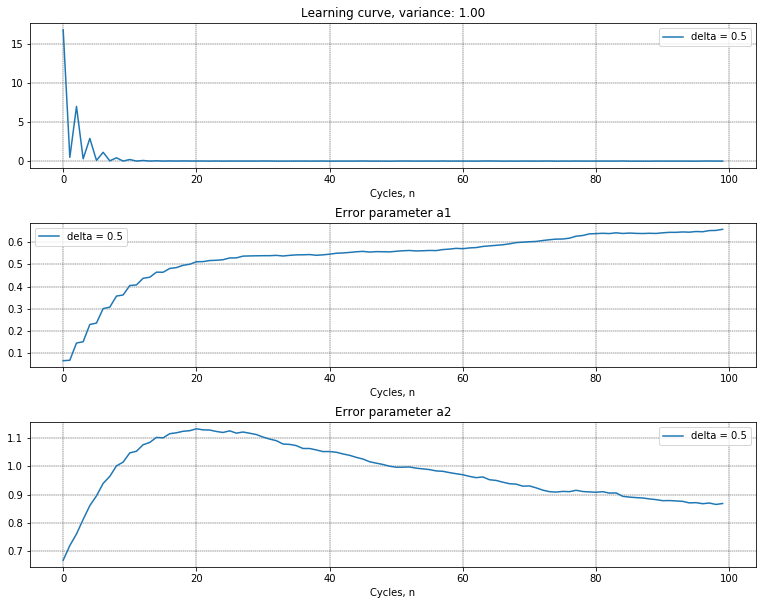

In [27]:
#------------------------------------------------
# Chapter 7, problem 10
#------------------------------------------------
# In this problem, we revisit the computer experiment described in Problem 18 of Chapter 6.
# We are given the AR process:
# u(n) = -a1*u(n - 1) - a2*u(n - 2) + v(n),
# where a1 = 0.1 and a2 = - 0.8. The v(n) is white noise with zero mean and a variance chosen
# to make the variance of u(n) equal to unity.
# (a) Plot the learning curve of the normalized LMS algorithm used to estimate the AR
# parameters a1 and a2. In this computation, use the following parameters:
# mu = 0.2
# and
# delta = 0.5.
# For the plot, average the squared error signal e(n) over an ensemble of 100 independent
# Monte Carlo runs of the experiment.
# (b) Plot the corresponding errors in tap-weight estimates.
# (c) Repeat the plots in parts (a) and (b) for the regularizing parameter delta = 0.25, 0.75. What
# observation can you make on the effect of varying delta?
#------------------------------------------------

# parameters
mu = 0.2
delta = 0.5

# 100 Monte Carlo simulations
carlos = 100

# initialize with zeros
y = np.zeros((n,carlos))
e = np.zeros((n,carlos))
deva = np.zeros(carlos)
e1k = np.zeros((n,carlos))
e2k = np.zeros((n,carlos))

# perform
for k in range(carlos):
    signal = aru(n = (n+m), ic = 5, sigma = 0.2)
    w = np.zeros(m)
    for i in range(n):
        # calculating step
        u = np.array(signal[i:i+m])
        y[i] = u.dot(w)
        # updating step
        e[i,k] = signal[i+m] - y[i,k]
        mod = u.dot(u)
        w = w + (mu / (delta + mod) )* u * e[i,k]
        e1k[i,k] = -a1 - w[0]
        e2k[i,k] = -a2 - w[1]
        y[i,k] = u.dot(w)
    deva[k] = np.std(signal)

# Calculate the mean
f = np.zeros(n)
f = np.mean(e ** 2, axis=1)
dev = np.mean(deva)
e1 = np.mean(e1k ** 2, axis=1)
e2 = np.mean(e2k ** 2, axis=1)

# Plot the Errors
fig, ax = plt.subplots(3,1,figsize=(13,10))
ax[0].set_title('Learning curve, variance: {:.2f}'.format(dev))
ax[0].plot(f, label = 'delta = 0.5'), ax[0].legend()
ax[0].set_xlabel('Cycles, n'), ax[0].grid(linestyle='--',linewidth='0.4', color='black')
ax[1].set_title('Error parameter a1')
ax[1].plot(e1, label = 'delta = 0.5'), ax[1].legend()
ax[1].set_xlabel('Cycles, n'), ax[1].grid(linestyle='--',linewidth='0.4', color='black')
ax[2].set_title('Error parameter a2')
ax[2].plot(e2, label = 'delta = 0.5'), ax[2].legend()
ax[2].set_xlabel('Cycles, n'), ax[2].grid(linestyle='--',linewidth='0.4', color='black')
plt.subplots_adjust(hspace = 0.38, wspace = 0.1)
plt.show()

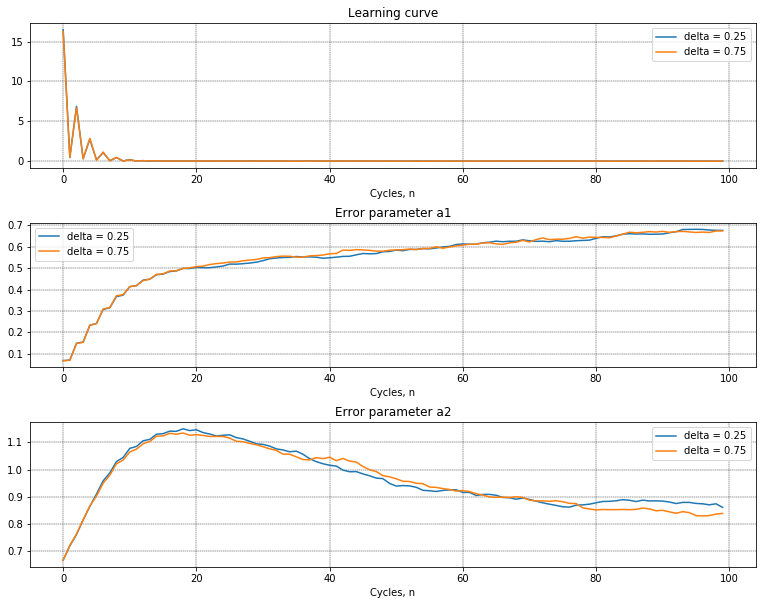

In [24]:
# parameters
mu = 0.2
delta = 0.25

# 100 Monte Carlo simulations
carlos = 100

# initialize with zeros
y = np.zeros((n,carlos))
e = np.zeros((n,carlos))
e1k = np.zeros((n,carlos))
e2k = np.zeros((n,carlos))

# perform delta 1
for k in range(carlos):
    signal = aru(n = (n+m), ic = 5, sigma = 0.2)
    w = np.zeros(m)
    for i in range(n):
        # calculating step
        u = np.array(signal[i:i+m])
        y[i] = u.dot(w)
        # updating step
        e[i,k] = signal[i+m] - y[i,k]
        mod = u.dot(u)
        w = w + (mu / (delta + mod) )* u * e[i,k]
        e1k[i,k] = -a1 - w[0]
        e2k[i,k] = -a2 - w[1]
        y[i,k] = u.dot(w)

# Calculate the mean
f_d1 = np.mean(e ** 2, axis=1)
e1_d1 = np.mean(e1k ** 2, axis=1)
e2_d1 = np.mean(e2k ** 2, axis=1)

# parameter
delta = 0.25

# initialize with zeros
y = np.zeros((n,carlos))
e = np.zeros((n,carlos))
e1k = np.zeros((n,carlos))
e2k = np.zeros((n,carlos))

# perform delta 1
for k in range(carlos):
    signal = aru(n = (n+m), ic = 5, sigma = 0.2)
    w = np.zeros(m)
    for i in range(n):
        # calculating step
        u = np.array(signal[i:i+m])
        y[i] = u.dot(w)
        # updating step
        e[i,k] = signal[i+m] - y[i,k]
        mod = u.dot(u)
        w = w + (mu / (delta + mod) )* u * e[i,k]
        e1k[i,k] = -a1 - w[0]
        e2k[i,k] = -a2 - w[1]
        y[i,k] = u.dot(w)

f_d2 = np.mean(e ** 2, axis=1)
e1_d2 = np.mean(e1k ** 2, axis=1)
e2_d2 = np.mean(e2k ** 2, axis=1)
    
# Plot the Errors
fig, ax = plt.subplots(3,1,figsize=(13,10))
ax[0].set_title('Learning curve'.format(dev))
ax[0].plot(f_d1, label = 'delta = 0.25')
ax[0].plot(f_d2, label = 'delta = 0.75'), ax[0].legend()
ax[0].set_xlabel('Cycles, n'), ax[0].grid(linestyle='--',linewidth='0.4', color='black')
ax[1].set_title('Error parameter a1')
ax[1].plot(e1_d1, label = 'delta = 0.25')
ax[1].plot(e1_d2, label = 'delta = 0.75'), ax[1].legend()
ax[1].set_xlabel('Cycles, n'), ax[1].grid(linestyle='--',linewidth='0.4', color='black')
ax[2].set_title('Error parameter a2')
ax[2].plot(e2_d1, label = 'delta = 0.25')
ax[2].plot(e2_d2, label = 'delta = 0.75'), ax[2].legend()
ax[2].set_xlabel('Cycles, n'), ax[2].grid(linestyle='--',linewidth='0.4', color='black')
plt.subplots_adjust(hspace = 0.38, wspace = 0.1)
plt.show()

## Reference

[1] Haykin, S. S. (2012). Adaptive filter theory. Pearson Education.

\begin{align} \delta \end{align}